## Исследование данных о российском кинопрокате



<div style="border:solid green 2px; padding: 20px">

Описание проекта.
    
Задача: изучить рынок российского кинопроката и выявить текущие тренды.
    
Описание датасетов:
    
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений.
    
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма;
    
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях;

### Шаг 1. Знакомство с данными

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 


In [2]:
#уйдем от "научной нотации" для отображения числовых значений
pd.options.display.float_format = '{:.3f}'.format 

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#открыть mkrf_shows
mkrf_shows = pd.read_csv('mkrf_shows.csv')

In [5]:
#ознакомиться с mkrf_shows
mkrf_shows.head()

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


In [6]:
#проверка на дубликаты
mkrf_shows['puNumber'].value_counts()

121020416    1
121013618    1
121025916    1
121030014    1
111003010    1
            ..
124001014    1
124003318    1
111000314    1
124005116    1
121016318    1
Name: puNumber, Length: 3158, dtype: int64

In [7]:
#открыть с mkrf_movies
mkrf_movies = pd.read_csv('mkrf_movies.csv')
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [8]:
#проверка на дубликаты
mkrf_movies['puNumber'].value_counts()

221154310    2
221054410    2
114003619    1
121013114    1
111002917    1
            ..
121019417    1
121011916    1
121004718    1
121019512    1
114006118    1
Name: puNumber, Length: 7484, dtype: int64

### Шаг 2. Предобработка данных

In [9]:
#ознакомиться с mkrf_movies
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

замена типа данных mkrf_movies['puNumber'] через констукрцию mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64') выдает ошибку "ValueError: invalid literal for int() with base 10: 'нет'". нужно посмотреть строку, где mkrf_movies['puNumber'] == 'нет'

In [10]:
#просмотр строки, где mkrf_movies['puNumber'] == 'нет'
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#замена значения mkrf_movies['puNumber'] == 'нет' на 0
mkrf_movies['puNumber'].replace('нет','0', inplace=True)

#замена типа данных с object на int64
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')

In [12]:
#замена типов данных в show_start_date на datetime64
mkrf_movies['show_start_date'] = pd.to_datetime(mkrf_movies['show_start_date'], format='%Y-%m-%d')

In [13]:
mkrf_movies['puNumber'].describe()

count        7486.000
mean    135178527.637
std      38382177.411
min             0.000
25%     112025043.000
50%     121015464.500
75%     124003313.750
max     231001111.000
Name: puNumber, dtype: float64

In [14]:
#ознакомиться с mkrf_shows
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [15]:
#замена типа данных с float на int64 в mkrf_shows
mkrf_shows.astype({'box_office': 'int64', 'puNumber': 'int64'})

,puNumber,box_office
0,111000113,2450
1,111000115,61040
2,111000116,153030013
3,111000117,12260956
4,111000118,163684057
...,...,...
3153,224014814,1530
3154,224021411,9270
3155,224022410,400
3156,224023210,360


In [16]:
#объеденение 2х датафреймов по общему столбцу - puNumber (номер прокатного удостоверения)
df = pd.merge(mkrf_movies, mkrf_shows, how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [17]:
#получения количества NaN элементов
df.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

В результате исследования установлено, что:
* title, тип данных object, кол-во пропусков 0 => ничего не нужно менять, так как это название фильма и все заполнено;
* puNumber, тип данных int64, кол-во пропусков 0 => ничего не нужно менять;
* show_start_date, тип данных datetime64, кол-во пропусков 0 => ничего не нужно менять;
* type, тип данных object, кол-во пропусков 0 => ничего не нужно менять;
* film_studio, тип данных object, кол-во пропусков 18 => можно вместо пропусков указать " ", никаким расчетным значением не заполнить, так как это название кино-студии;
* production_country, тип данных object, кол-во пропусков 2 => можно вместо пропусков указать " ", никаким расчетным значением не заполнить, так как это страна-производитель;
* director, тип данных object, кол-во пропусков 9 => можно вместо пропусков указать " ", никаким расчетным значением не заполнить, это уникальное фио режиссера;
* producer, тип данных object, кол-во пропусков 2568 => можно вместо пропусков указать " ", никаким расчетным значением не заполнить, это уникальное фио продюссера;
* age_restriction, тип данных object, кол-во пропусков 0 => ничего не нужно менять;
* refundable_support, тип данных float64, кол-во пропусков 7154 => нужно посмотреть внимательнее;
* nonrefundable_support, тип данных float64, кол-во пропусков 7154 => нужно посмотреть внимательнее;
* budget, тип данных float64, кол-во пропусков 7154 => можно вместо пропусков указать " ";
* financing_source, тип данных object, кол-во пропусков 7154 => нужно посмотреть внимательнее, может можно категоризировать;
* ratings, тип данных object, кол-во пропусков 967 => можно вместо пропусков указать " ". Однако необходимо исправить данные, где указаны % значения (обнаружено на более поздних этапах исследования); 
* genres, тип данных object, кол-во пропусков 976 => можно вместо пропусков указать " ";
* box_office, тип данных float64, кол-во пропусков 4328 => нужно посмотреть внимательнее.

In [18]:
#изучим уникальные значения mkrf_movies['ratings'] 
mkrf_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Вывод: нужно привести данные к единой системе: убрать знак % и поставить точку, то есть 83% = 8.3

In [19]:
#функция для удаления знака %
def clean_percents(x):
    if '%' in x:
        return int(x[:-1]) / 10
    else:
        return float(x)

#применение функции
mkrf_movies['ratings'].fillna('0').apply(clean_percents).unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В ходе ревью подсказали, что можно сделать элегантнее: data['column'] = pd.to_numeric(data['column'], errors='coerce')

In [20]:
#замена NAN на '0' в df['ratings'] и df['budget']
df[['ratings', 'budget']] = df[['ratings', 'budget']].fillna(0)

In [21]:
#замена NAN на 'текст'
df[['film_studio']] = df[['film_studio']]. fillna('студия не указана')
df[['producer']] = df[['producer']]. fillna('продюсер не указан')
df[['production_country']] = df[['production_country']]. fillna('студия не указана')
df[['director']] = df[['director']]. fillna('режиссер не указан')
df[['genres']] = df[['genres']]. fillna('жанр не указан')
df[['financing_source']] = df[['financing_source']]. fillna('коммерческое кино')

In [22]:
#изучение refundable_support, nonrefundable_support, financing_source, box_office
df[df['refundable_support'].notnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.1,"драма,мелодрама",365353.600
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,0,жанр не указан,28140.000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.3,"комедия,фантастика",19957031.500
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.2,драма,55917.500
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.4,драма,232100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.000,400000000.000,980000000.000,Фонд кино,6.0,"история,биография,драма",717703185.530
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.000,0.000,190000000.000,Фонд кино,6.7,"мультфильм,приключения,семейный",501069235.000
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.000,400000000.000,944000000.000,Фонд кино,5.7,"фантастика,боевик",NaN
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,30000000.000,46154000.000,Министерство культуры,5.9,драма,NaN


Вывод: в столбцах таблицы refundable_support, nonrefundable_support, financing_source, box_office указаны конкретные цифровые значения, заполнить каким-либо расчетным значением - исказить картину. Имеет смысл заменить NAN на 0. 
Тип данных Числа с плавающей точкой - можно оставить без изменений.

In [23]:
#замена NAN на 0
df[['refundable_support', 'nonrefundable_support', 'financing_source', 'box_office']] \
= df[['refundable_support', 'nonrefundable_support', 'financing_source', 'box_office']]. fillna (-1)

In [24]:
#получения количества NaN элементов в записях
df.isnull().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

In [25]:
#проверка на дубликаты
duplicate = df[df.duplicated(keep = 'last')]

Вывод: в датафрейме не найдено явных дубликатов. Нужно посмотреть на наличие технических ошибок, опечаток и т.д. категориальных значений: названия фильмов, типы фильмов (задание 2.4.), названия студий, ФИО продюсера, режиссера 
Возможные причины появления дубликатов: технические ошибки, человеческий фактор.

При этом: df результат объединения 2х датасетов по прокатному удостоверению (puNumber) и исходя из задания известно, что у  одного фильма может быть 2 прокатных удостоверения, следовательно, совпадения фильмов по названию - норма. 

In [26]:
#поймем кол-во дубликатов по  df['title']
df['title'].value_counts()

День святого Валентина_                5
Код доступа "Кейптаун"                 4
Химера                                 4
Секс в большом городе 2                4
Дорога /По новелле Кормака МкКарфи/    4
                                      ..
Кровь моей крови                       1
Ой, мамочки (2017)                     1
Гранд Централ. Любовь на атомы         1
Новогодний ремонт                      1
Зачётный препод                        1
Name: title, Length: 6772, dtype: int64

In [27]:
#поймем кол-во дубликатов по df['puNumber']
df['puNumber'].value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: puNumber, Length: 7484, dtype: int64

In [28]:
#посмотрим строки, у которых номера прокатных удостоверений совпадают, то есть 221054410 и 221154310
df.loc[((df['puNumber'] == 221054410) | (df['puNumber'] == 221154310))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,-1.000,-1.000,0.000,коммерческое кино,7.0,"мелодрама,комедия",-1.000
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,-1.000,-1.000,0.000,коммерческое кино,7.6,"драма,мелодрама,история",-1.000
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,-1.000,-1.000,0.000,коммерческое кино,7.4,"комедия,криминал",-1.000
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,-1.000,-1.000,0.000,коммерческое кино,6.8,"комедия,криминал",-1.000


In [29]:
#проверка есть ли совпадения по названию фильма и номеру прокатного удостоверения
df[df.duplicated(['title', 'puNumber'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Вывод: нет совпадений по названию фильма и номеру прокатного удостоверения

In [30]:
#изучение столбца df['film_studio']
df['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                                                                                                341
ООО "Мульт в кино"                                                                                                                                                                                    57
Анимаккорд Лтд                                                                                                                                                                                        23
студия не указана                                                                                                                                                                                     18
ООО "Мульт в кино"                                                                                                                                                                                  

Определены ошибки/странности:
* ООО "Мульт в кино" => проверить на тех.ошибки/опечатки...возможно буква "о" на англ и русс языках;
* разный регист => сделать единообразным;

Отметим, что оформление не единообразно (где-то указана форма собственности, где-то нет; где-то есть кавычки, где-то нет). 

In [31]:
#приведение к одному регистру df['film_studio']
df['film_studio'] = df['film_studio'].str.lower()

# заменим ё на е 
df['film_studio'] = df['film_studio'].str.replace('ё', 'е')
#to_excel(r'C:\Users\79163\data_analasys\Остек-СТ\1.xlsx')

In [32]:
#подсчет уникальных значений с учетом изменения ругистра
df['film_studio'].value_counts()

киностудия "мосфильм"                                                                                                                                  341
ооо "мульт в кино"                                                                                                                                      57
анимаккорд лтд                                                                                                                                          23
студия не указана                                                                                                                                       18
ооо "мульт в кино"                                                                                                                                      18
                                                                                                                                                      ... 
мьючел филм компани, полиграм филмд интертейнмент, марубени, тохо-това

In [33]:
#просмотр фильмов студии ооо "мульт в кино" - почему их словно бы 2 разные студии?
'ооо "мульт в кино"' == 'ооо "мульт в кино"'
#записи одинаковые

True

In [34]:
#посмотрим длинну
len(set(df['film_studio'])), df['film_studio'].nunique()

(5449, 5449)

In [35]:
# оказывается лишний пробел в окончании после ковычек 'ооо "мульт в кино"' != 'ооо "мульт в кино"_'
pd.DataFrame(df['film_studio'].value_counts()).index

Index(['киностудия "мосфильм"', 'ооо "мульт в кино"', 'анимаккорд лтд',
       'студия не указана', 'ооо "мульт в кино" ',
       'фгуп "тпо "киностудия "союзмультфильм"', 'ооо "таббак"', 'опус арте',
       'р а и синема', 'ооо "студия анимационного кино "мельница"',
       ...
       'индиго филм, патэ, франс 2 синема, нумбер 9 филмз, медуза филм, филм 4, канал +, сине +, франс телевизьон, телеклуб',
       'сэмуэль голдвин филмз, дэстинейшн филмз, жеримака филм',
       'партизан фильм, нексус фэктори, потемкино, шмуз',
       'центропа интертейнмент, изабелла филмз интернэшнл, мемфис фильм интернэшнл, пэйн анлимитед, сигма филмз, слот машин, арт франс синема, франс 3 синема, эн пэ эс телевижн, норск ти ви 2 а эс',
       'агат фильм и си, артеми продюксьон, франс 3 синема, радио телевизьон бельж франкофон, бельгаком, канал +, сине +, франс телевизьон ',
       'мьючел филм компани, полиграм филмд интертейнмент, марубени, тохо-това, теле-мюнхен, би-би-си ,ю-жи-си, мувимэйкерс нордис

In [36]:
#корректировка df['film_studio']
df['film_studio'] = df['film_studio'].str.strip()

In [37]:
#подсчет уникальных значений с учетом всех корректировок
df['film_studio'].value_counts()

киностудия "мосфильм"                                345
ооо "мульт в кино"                                    75
анимаккорд лтд                                        23
студия не указана                                     18
ооо "таббак"                                          18
                                                    ... 
ип истратов андрей валерьевич                          1
майфилмз                                               1
калигари фильм                                         1
ооо кинокомпания "соливс" по заказу ао "вбд груп"      1
лосев с.а.                                             1
Name: film_studio, Length: 5421, dtype: int64

С учетом полученного опыта сразу приведем все категориальные значения к нижнему регистру

In [38]:
#цикл для приведения категориальных значений к нижнему регистру
for col in ['production_country', 'director', 'producer', 'type', 'financing_source']:
    df[col] = df[col].str.lower()

In [39]:
#изучение столбца df['production_country']. 
df['production_country'].value_counts()

сша                        2172
россия                     1821
ссср                        347
франция                     301
великобритания              257
                           ... 
республика армения            1
германия, франция             1
канада, сша, норвегия         1
россия, франция, латвия       1
россия, румыния               1
Name: production_country, Length: 950, dtype: int64

In [40]:
#изучение столбца df['producer']
# заменим ё на е 
df['producer'] = df['producer'].str.replace('ё', 'е')
df['producer'].value_counts()

продюсер не указан                                                568
п.смирнов                                                          67
олег кузовков, дмитрий ловейко, марина ратина                      28
с.сельянов                                                         18
д.ловейко, о.кузовков                                              17
                                                                 ... 
дед гарднер, николас гонда, брэд питт, бил полланд, грант хилл      1
джонатан кинг, мишель литвак, гари майкл уотерс                     1
мерседес гамеро, адриан герра, микель лехарса                       1
кристофер робертс, сьюзен хоффман                                   1
а.роднянский, с.мелькумов, г.фетисов                                1
Name: producer, Length: 5340, dtype: int64

In [41]:
#изучение столбца df['age_restriction']
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [42]:
#изучение столбца df['genres']
df['genres'].value_counts()

жанр не указан                 976
драма                          476
комедия                        352
мелодрама,комедия              222
драма,мелодрама,комедия        189
                              ... 
вестерн,биография,драма          1
фантастика,драма,криминал        1
драма,фэнтези,история            1
мультфильм,мюзикл,мелодрама      1
комедия,криминал,биография       1
Name: genres, Length: 743, dtype: int64

In [43]:
#изучение столбца df['financing_source']
df['financing_source'].value_counts()

коммерческое кино                   7154
министерство культуры                164
фонд кино                            146
министерство культуры, фонд кино      22
Name: financing_source, dtype: int64

In [44]:
#изучение столбца df['type']
df['type'].value_counts()

художественный                4520
 художественный               1389
анимационный                   828
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
 анимационный                    1
Name: type, dtype: int64

Вывод: есть 2 одинаковых категории:
* "Художественный" и " Художественный" (с пробелом);
* "Анимационный" и " Анимационный" (с пробелом);

Причина: ошибка (в случае заполнения датасета человеком) и/или тех.сбой в случае автоматического формирования датасета 
Нужно привести в соответствие

In [45]:
#корректировка df['type']
df['type'] = df['type'].str.strip()

#проверка
df['type'].value_counts()

художественный                5909
анимационный                   829
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
Name: type, dtype: int64

Частично работа с категориальными данными проведена выше в разделе "работа с дубликатами".
Общая проблема: пробелы; дубликаты из-за разного регистра (устранено)

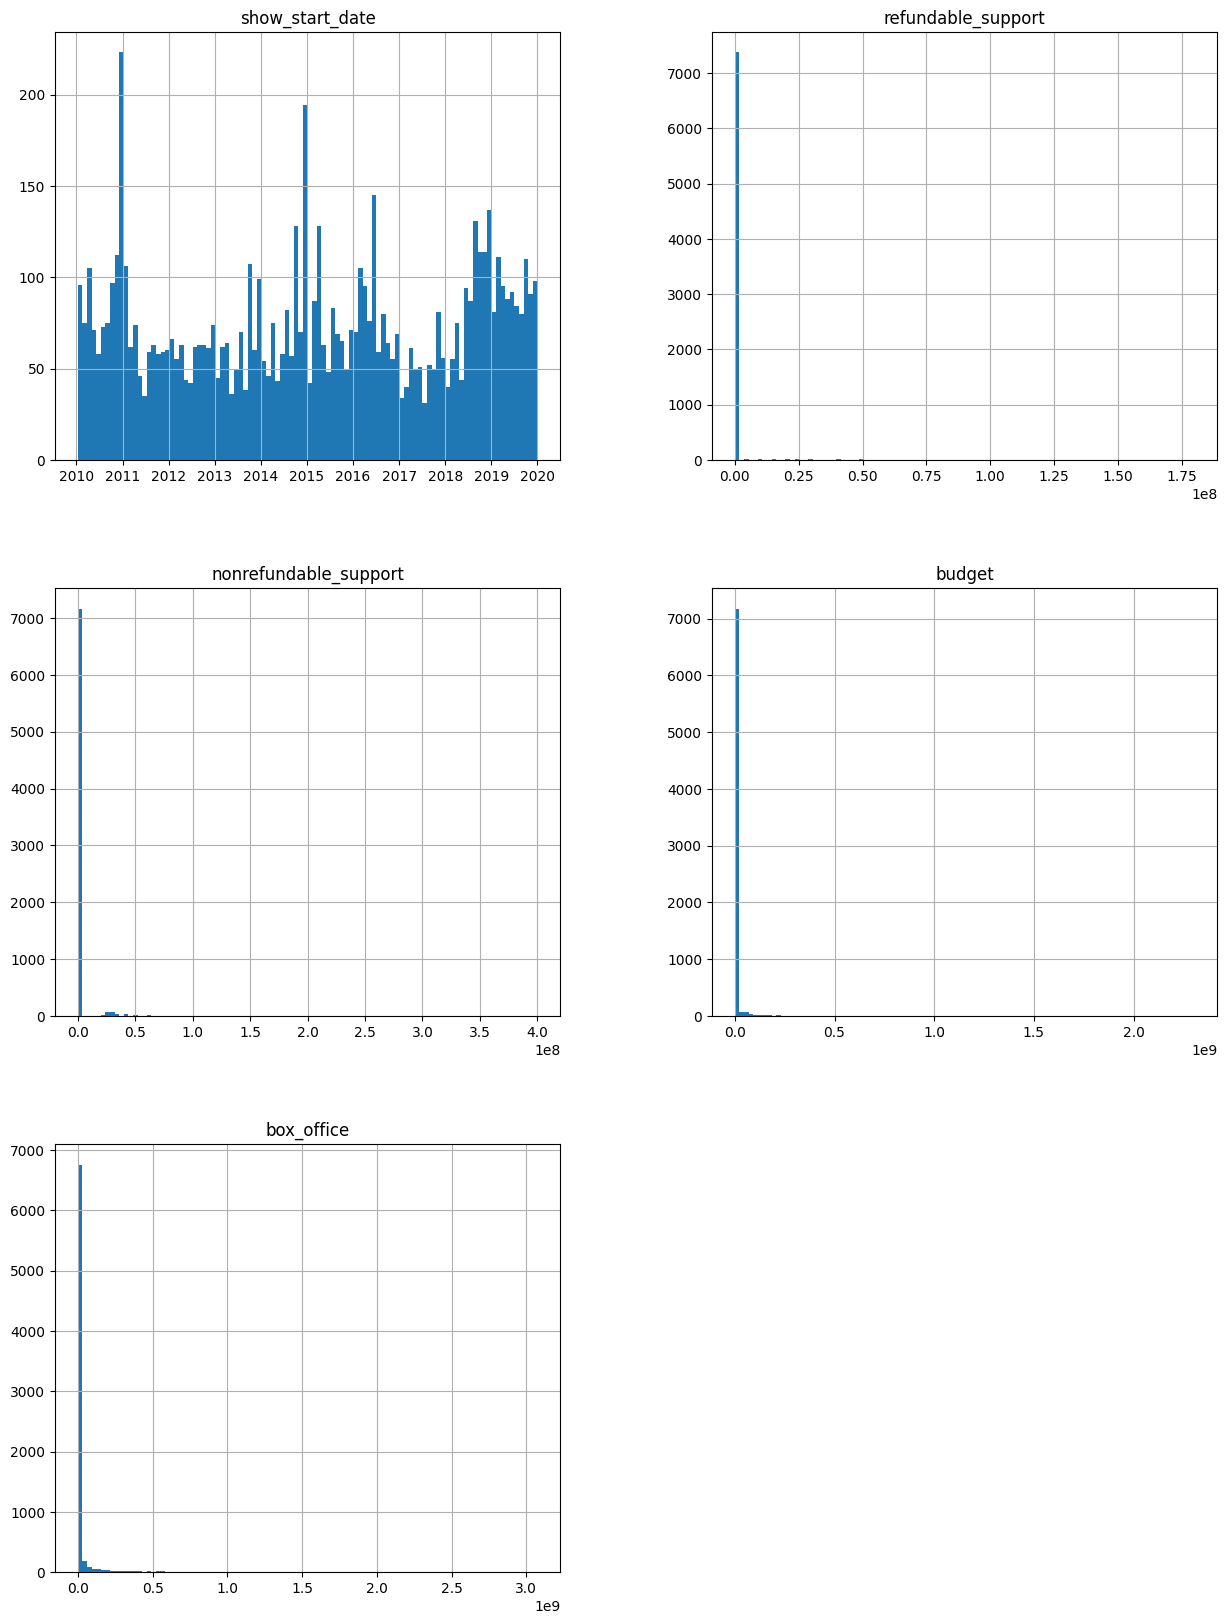

In [46]:
#гистограммы по количественным значениям
df[['show_start_date', 'refundable_support', 'nonrefundable_support', 'budget', 'box_office']].hist(figsize=(15, 20), bins=100);

Видно смещение гистограммы вправо; есть очень большие пики (это замена пропусков на "0")

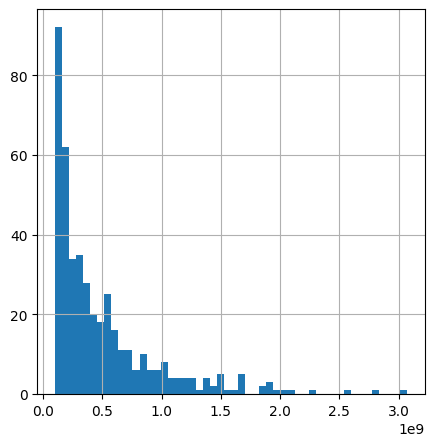

In [47]:
#гистограммы для значений 'box_office' больше 100 000 000
df.loc[df['box_office'] > 100000000,'box_office'].hist(figsize=(5, 5), bins=50);

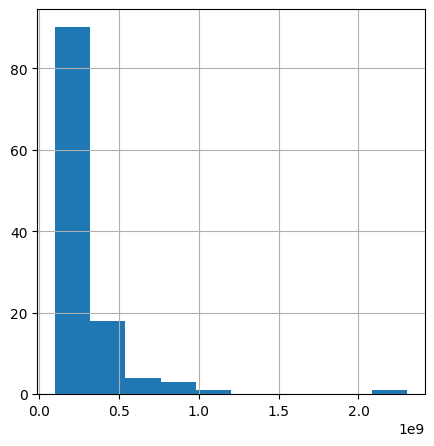

In [48]:
#гистограммы для значений 'budget' больше 100 000 000
df.loc[df['budget'] > 100000000,'budget'].hist(figsize=(5, 5), bins=10);

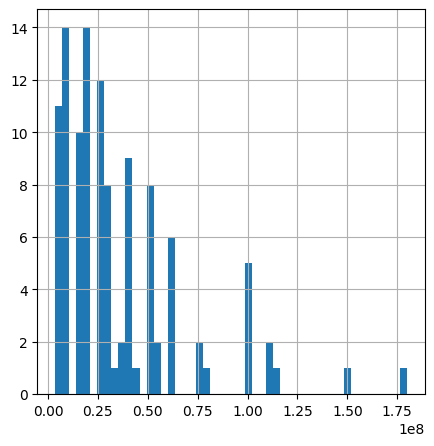

In [49]:
#гистограммы для значений 'refundable_support' больше 0
df.loc[df['refundable_support'] > 0,'refundable_support'].hist(figsize=(5, 5), bins=50);

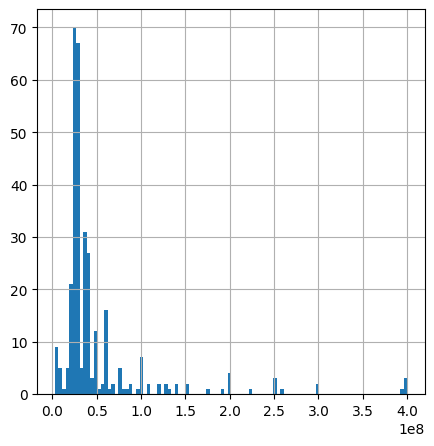

In [50]:
#гистограммы для значений 'nonrefundable_support' больше 0
df.loc[df['nonrefundable_support'] > 0,'nonrefundable_support'].hist(figsize=(5, 5), bins=100);

In [51]:
#изучение количественных значений
df[['show_start_date', 'refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,7486.000,7486.000,7486.000,7486.000
mean,526181.251,2172279.075,5642568.253,32262853.079
std,5781108.172,16148935.574,47528177.687,160600784.280
min,-1.000,-1.000,0.000,-1.000
25%,-1.000,-1.000,0.000,-1.000
50%,-1.000,-1.000,0.000,-1.000
75%,-1.000,-1.000,0.000,1080467.990
max,180000000.000,400000000.000,2305074303.000,3073568690.790


Вывод: было много пропусков в количественных значениях и это пропуски были заменены на 0, что видно выше. 
Можно изучить данные без учета 0 значений. Нет необходимости заменять 0 на что-либо...это только исказит картину.

In [52]:
#изучение количественных значений 'refundable_support' без 0
df.loc[(df['refundable_support'] != 0), 'refundable_support'].describe()

count        7265.000
mean       542187.591
std       5867651.942
min            -1.000
25%            -1.000
50%            -1.000
75%            -1.000
max     180000000.000
Name: refundable_support, dtype: float64

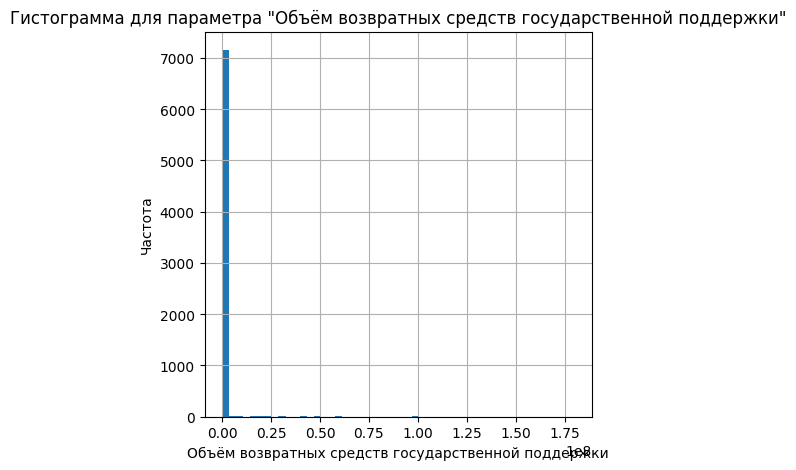

In [53]:
#гистограммы по количественным значениям без учета 0 значений для df['refundable_support']
fig, ax = plt.subplots()
df.loc[(df['refundable_support'] != 0), 'refundable_support'].hist(figsize=(5, 5), bins=50);
plt.title('Гистограмма для параметра "Объём возвратных средств государственной поддержки"');

#  Добавляем подписи к осям:
ax.set_xlabel('Объём возвратных средств государственной поддержки')
ax.set_ylabel('Частота')
plt.show()

Вывод: гистограмма со смещением вправо; среднее значение больше медианы. Всего 111 фильмов получили возвратные средства господдержки; средний объем =  35 486 486.486 руб

In [54]:
#изучение количественных значений 'nonrefundable_support без 0
df.loc[(df['nonrefundable_support'] != 0), 'nonrefundable_support'].describe()

count        7477.000
mean      2174893.829
std      16158477.125
min            -1.000
25%            -1.000
50%            -1.000
75%            -1.000
max     400000000.000
Name: nonrefundable_support, dtype: float64

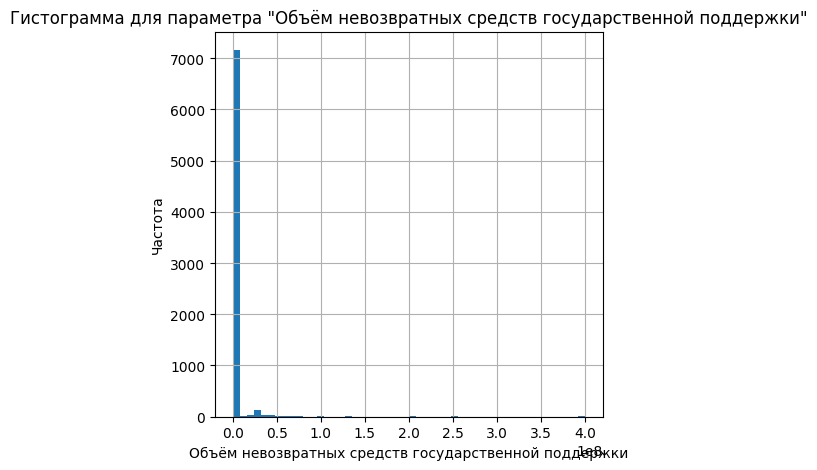

In [55]:
#гистограммы по количественным значениям без учета 0 занчений для df['nonrefundable_support']
fig, ax = plt.subplots()
df.loc[(df['nonrefundable_support'] != 0), 'nonrefundable_support'].hist(figsize=(5, 5), bins=50);
plt.title('Гистограмма для параметра "Объём невозвратных средств государственной поддержки"');

#  Добавляем подписи к осям:
ax.set_xlabel('Объём невозвратных средств государственной поддержки')
ax.set_ylabel('Частота')
plt.show()

Вывод: гистограмма со смещением вправо; среднее значение больше медианы. Всего 323 фильма получили невозвратные средства господдерки; средний объем =  50 345 784.248 руб

In [56]:
#изучение количественных значений 'budget без 0
df.loc[(df['budget'] != 0), 'budget'].describe()

count          315.000
mean     134096082.346
std      191226039.634
min       14462464.000
25%       46153866.500
50%       73379554.000
75%      150004286.500
max     2305074303.000
Name: budget, dtype: float64

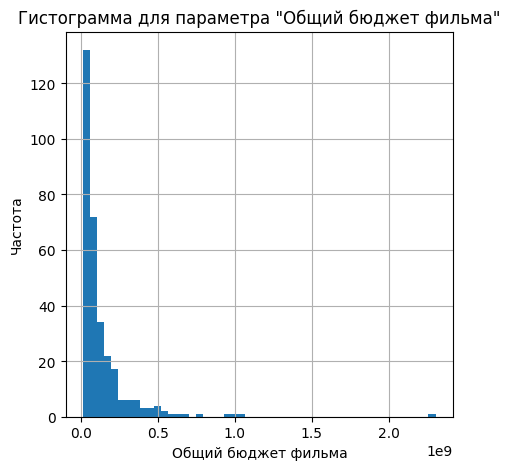

In [57]:
#гистограммы по количественным значениям без учета 0 занчений для df['budget']
fig, ax = plt.subplots()
df.loc[(df['budget'] != 0), 'budget'].hist(figsize=(5, 5), bins=50);
plt.title('Гистограмма для параметра "Общий бюджет фильма"');

#  Добавляем подписи к осям:
ax.set_xlabel('Общий бюджет фильма')
ax.set_ylabel('Частота')
plt.show()

Вывод: гистограмма со смещением вправо; среднее значение больше медианы. 
Всего известны бюджеты 315; средний бюджет =  134 096 082.346 руб

In [58]:
#изучение количественных значений 'box_office' без 0
df.loc[(df['box_office'] != 0), 'box_office'].describe()

count         7462.000
mean      32366619.961
std      160848440.056
min             -1.000
25%             -1.000
50%             -1.000
75%        1096438.000
max     3073568690.790
Name: box_office, dtype: float64

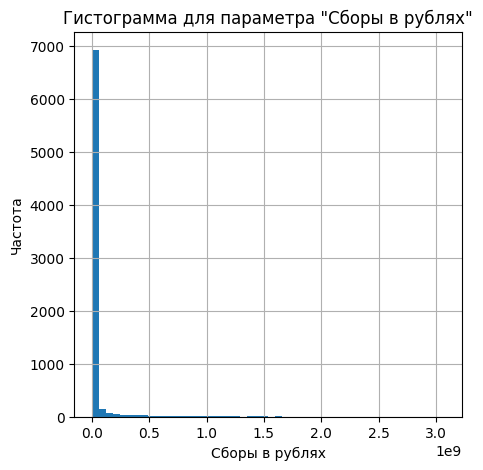

In [59]:
#гистограммы по количественным значениям без учета 0 занчений для df['box_office']
fig, ax = plt.subplots()
df.loc[(df['box_office'] != 0), 'box_office'].hist(figsize=(5, 5), bins=50);
plt.title('Гистограмма для параметра "Сборы в рублях"');

#  Добавляем подписи к осям:
ax.set_xlabel('Сборы в рублях')
ax.set_ylabel('Частота')
plt.show()

Вывод: гистограмма со смещением вправо; среднее значение больше медианы. 
Всего известны сборы по 3134 фильмам; средняя сумма =  77 064 365.819 руб

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [60]:
#год проката фильма
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

In [61]:
#ФИО главного режиссера
df['main_director'] = df['director'].str.split(',').str[0]

In [62]:
#основной жанр фильма
df['main_genres'] = df['genres'].str.split(',').str[0]

In [63]:
#доля господдержки от общего бюджета фильма
#при этом из задания известно, что budget включает в себя полный объём государственной поддержки
#берем в расчет только фильмы, где есть господдержка (создание нового датасета)
data = df[(df['refundable_support'] != 0) & (df['budget'] != 0)]

#создание столбца с долей господдержки в новом датасете
data = data.assign(share_state_support = ((df['refundable_support'] + df['nonrefundable_support']) 
                                          / df['budget'])*100)

#проверка
data['share_state_support'].describe()

count   101.000
mean     52.013
std      16.524
min      10.023
25%      42.308
50%      57.345
75%      65.449
max      78.475
Name: share_state_support, dtype: float64

Вывод: в среднем размер господдежки порядка 50% от бюджета 

### Шаг 3. Исследовательский анализ данных


In [64]:
#Сколько фильмов выходило в прокат каждый год и их доходность
#определим какую долю составляют фильмы с информацией о сумме сбора
pd.pivot_table(df,
               index=['year'],
               values=['box_office'],
               aggfunc=[np.sum, 'count'])

,sum,count
,box_office,box_office
year,,
2010,2427774.000,985
2011,14102252.000,622
2012,6954958.000,593
2013,29799260.200,630
2014,7444951331.200,807
2015,39497364956.400,705
2016,47866299449.910,818
2017,48563707069.510,505


Вывод: больше всего фильмов вышло в 2010 и 2019м годах

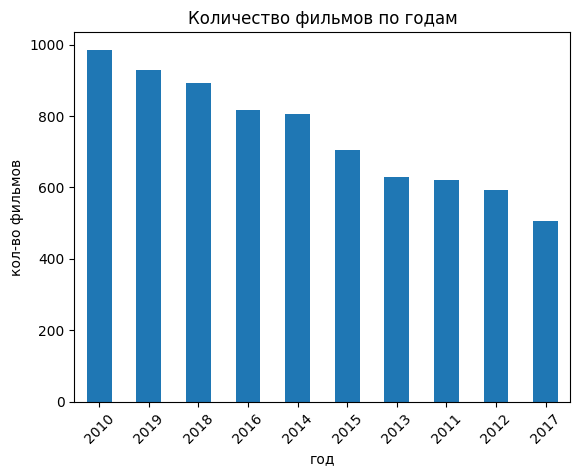

In [65]:
#визуализация кол-ва фильмов по годам
df['year'].value_counts().plot(kind='bar', rot=45);

#  Добавляем название диаграммы:
plt.title('Количество фильмов по годам')

#  Добавляем подписи к осям:
plt.xlabel("год")
plt.ylabel("кол-во фильмов")
plt.show()

In [66]:
#определим кол-во фильмов, где сборы от проката в кино > 0 
df.loc[df['box_office'] > 0].groupby(['year']).agg({'box_office': ['count']}).reset_index()

,year,box_office
,,count
0,2010,101
1,2011,109
2,2012,123
3,2013,179
4,2014,273
5,2015,462
6,2016,525
7,2017,357
8,2018,475


In [67]:
#определим долю составляют фильмы с информацией о сумме сбора
(df.loc[df['box_office'] > 0].groupby(['year']).agg({'box_office': ['count']})['box_office'] /
df.groupby(['year']).agg({'box_office': ['count']})['box_office'])

,count
year,
2010,0.103
2011,0.175
2012,0.207
2013,0.284
2014,0.338
2015,0.655
2016,0.642
2017,0.707
2018,0.533


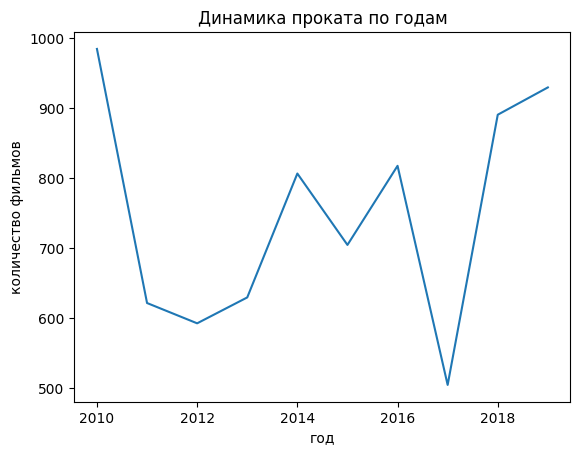

In [68]:
#Как менялась динамика проката по годам ()
plt.plot(df[['year', 'puNumber']].groupby('year').count()['puNumber']);
#  Добавляем название диаграммы:
plt.title('Динамика проката по годам')

#  Добавляем подписи к осям:
plt.xlabel("год")
plt.ylabel("количество фильмов")
plt.show()

Вывод: меньше всего прокатных удостоверений было выдано в 2012 и в 2017м годах. По данным РБС: изменения в Правилах выдачи, отказа в выдаче и отзыва прокатного удостоверения на фильм вступили в силу 31 декабря 2016 года. Прокатное удостоверение, согласно этим изменениям, должно выдаваться на показ фильма в кинозале, на прокат фильма на материальном носителе и на показ фильма «другими техническими способами» - вероятно это могло повлиять на кол-во прокатных удостоверений в 2017м году.

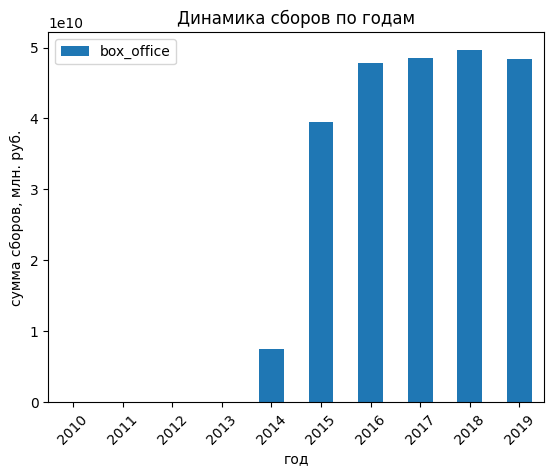

In [69]:
#визуализация сборов в рублях
df[['box_office', 'year']].groupby('year').sum().plot(kind='bar', rot=45);

#  Добавляем название диаграммы:
plt.title('Динамика сборов по годам')

#  Добавляем подписи к осям:
plt.xlabel("год")
plt.ylabel("сумма сборов, млн. руб.")
plt.show()

In [70]:
#максимальная и минимальная сумма сборов
df[['year', 'box_office']].groupby(['year']).sum()['box_office']

year
2010       2427774.000
2011      14102252.000
2012       6954958.000
2013      29799260.200
2014    7444951331.200
2015   39497364956.400
2016   47866299449.910
2017   48563707069.510
2018   49668402718.320
2019   48425708379.590
Name: box_office, dtype: float64

Вывод: по имеющимся данным
* максимальная сумма сборов была в 2018 году и составила 49 668 403 134.320 руб
* минимальный размер сборов был в 2010 году и составил 2 428 654,00 руб

Вероятно данные за период с 2010 по 2014й год заполнены не полностью/представлены в датасете хуже. Данные за период с 2015 по 2019 год более "полные"

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Отступление: демонтстрация фильма в прокате возможна только при наличии прокатного удостоверения - puNumber. Изначально объединение 2х таблиц шло именно по этому признаку. Неочень понятен вопрос в таком случае: если все фильмы имеют прокатное удостоверение, то обо всех фильмах есть информация о прокате.
Кроме фильма Курбан-роман. (История с жертвой) - см 8ю строку кода.

Вероятно имеется ввиду что не у всех фильмов есть информация о сборах в рублях, то есть может они не показывались в итоге?

In [71]:
# поймем долю фильмов, где есть информация о размере сбора в прокате в рублях
df[['year', 'box_office']].groupby(['year']).mean()*100

,box_office
year,
2010,246474.518
2011,2267243.087
2012,1172842.833
2013,4730041.302
2014,922546633.358
2015,5602463114.383
2016,5851625849.622
2017,9616575657.329
2018,5574455972.875


Вывод: полнее всего представлены данные за период с 2015 по 2019й год

In [72]:
#Посчитайте среднюю и медианную сумму сборов для каждого года
pd.pivot_table(df,
               index=['year'],
               values=['box_office'],
               aggfunc=[np.mean, np.median])

,mean,median
,box_office,box_office
year,,
2010,2464.745,-1.000
2011,22672.431,-1.000
2012,11728.428,-1.000
2013,47300.413,-1.000
2014,9225466.334,-1.000
2015,56024631.144,739938.000
2016,58516258.496,479832.500
2017,96165756.573,2522174.000


Вывод: результаты расчета среднего значительно отличаются от результатов расчета медианы. 
Среднее (сумма всех значений / общее количество значений) было бы показательно, если бы парамет 'box_office' имел нормальное распределение, а у нас гистограмма со смещением вправо (данные распределены не нормально).

Медиана — это значение, которое находится в центре (прямо посередине); данное значение достовернее.

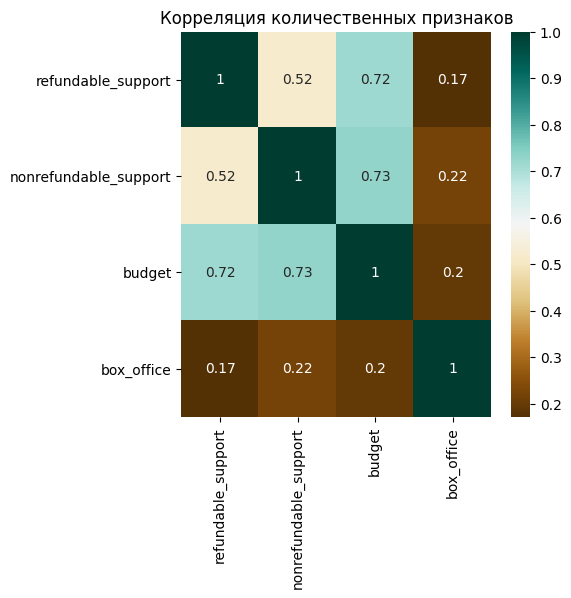

In [73]:
#Посмотрим на корреляции количественных признаков
corr_matrix = df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr_matrix,cmap="BrBG", annot= True);

#  Добавляем название диаграммы:
plt.title('Корреляция количественных признаков');

Вывод:
* выявлена высокая корреляция между бюджетом и долей господдержки
* не выявлено высокой корреляции между суммой сборов от фильма и долей господдежрки, размером бюджета

In [74]:
#сводная таблица
df[df['year'] > 2014].pivot_table(index='age_restriction', columns='year', values='box_office', aggfunc='sum')

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,379054567.370,150228816.670,229598889.000,32448930.110,17745996.820
«12+» - для детей старше 12 лет,13616081944.910,12204446470.390,7851427631.670,14267291484.690,12680198655.670
«16+» - для детей старше 16 лет,11368120789.270,16664548454.740,18745042868.060,16503602267.960,12753418896.600
«18+» - запрещено для детей,5432308307.440,6793929724.870,9651495556.020,8760085458.150,10121796231.640
«6+» - для детей старше 6 лет,8701799347.410,12053145983.240,12086142124.760,10104974577.410,12852548598.860


Вывод: да, возрастное ограничение влияет на сборы фильма в прокате в период с 2015 по 2019 года, наиболее прибыльные фильмы категории "16+"
* 2019 год: наиболее прибыльная категория фильмы категории "6+";
* 2018 год: наиболее прибыльная категория фильмы категории "16+";
* 2017 год: наиболее прибыльная категория фильмы категории "16+";
* 2016 год: наиболее прибыльная категория фильмы категории "16+";
* 2015 год: наиболее прибыльная категория фильмы категории "16+";

Обоснование: это наиболее широкая аудитория, вкл.несовершеннолетных с родителями.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [75]:
#изучение господдержки
pd.pivot_table(df,
               index=['year'],
               values=['refundable_support', 'nonrefundable_support'],
               aggfunc=[np.sum])

sum                   
     nonrefundable_support refundable_support
year                                         
2010              -985.000           -985.000
2011              -622.000           -622.000
2012              -593.000           -593.000
2013         134347317.000           -628.000
2014         501001508.000       70999209.000
2015        3019087721.000      637152500.000
2016        3381654725.000      921499243.000
2017        2464624317.000      719346417.000
2018        2784968630.000      661999165.000
2019        3975999140.000      927999140.000

Вывод: основаные данные о господдежрке начинаются с 2013 года и размер увеличивается с каждым годом.

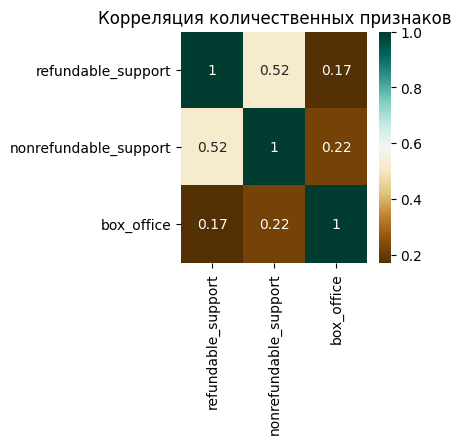

In [76]:
#Посмотрим на корреляцию господдержки и сборов от проката фильма, рейтинга
corr_matrix = df[['refundable_support', 'nonrefundable_support', 'box_office']].corr()
plt.figure(figsize = (3,3))
sns.heatmap(corr_matrix,cmap="BrBG", annot= True);

#  Добавляем название диаграммы:
plt.title('Корреляция количественных признаков');

Вывод: размер сборов от проката не сильно зависит от размера господдержки

In [77]:
#определение самого кассового фильма
df.loc[df['box_office'].argmax(), ['title', 'box_office']]

title                 Холоп
box_office   3073568690.790
Name: 7456, dtype: object

In [78]:
#определение фильмов с господдержкой, которые "окупились" (прибыль от проката > бюджета)
#выберем все не коммерчесческие фильмы, то есть фильмы, где есть участие государства
df_new = df[(df['financing_source'] != 'коммерческое кино')].copy()

# создание нового столбца, где указано любое постпление гос.денег
df_new['state_total'] = df_new['refundable_support'] + df_new['nonrefundable_support']

# посмотреть строки, где сумма, полученная от государства, превышает сборы от проката фильма
df_new.query('state_total > box_office').count()['title']

214

Вывод: у 214ти фильмов с господдержкой размер господдержки превышает размер сборов, то есть они не окупились

In [79]:
#посчитать кол-во фильмов с госфинансированием
len(df_new)

#посчитать долю фильмов, которые не окупили вложенные госсредства
df_new.query('state_total > box_office').count()['title'] / len(df_new)

0.6445783132530121

In [80]:
# поймем прибыльность от госфинансирования в целом: имеет ли смысл вообще вкладывать деньги в кино,
# если цель - исключительно получение прибыли
df_new['box_office'].sum() / df_new['state_total'].sum()

2.084756168222393

Вывод: в целом инвестиции в кино окупаются

### Шаг 5. Общий вывод

В ходе исследования было установлено:
1) Наличие пропусков - осуществлена замена пропусков, где это было необходимо.

2) Проведен анализ категориальных данных:
определены дубликатов по причине ошибок при вводе: наличие лишних пробелов; использование различных регистров;
Данные были приведены к единообразному виду (нижний регистр), удалены лишние пробелы; исправлены типы данных, где это было необходимо.

Установлено, что есть 2 посторяющихся номера прокатного удостоверения у разных фильмов: 221054410 и 221154310
Причина: ошибка при заполнении исходных датасетов (установлено, но дубликат был в mkrf_movies)

3) Проведен анализ количественных значений:
  1. 111 фильмов получили возвратные средства господдержки; средний объем =  35 486 486.486 руб
  2. 323 фильма получили невозвратные средства господдерки; средний объем =  50 345 784.248 руб 
  3. известны бюджеты 315; средний бюджет =  134 096 082.346 руб
  4. известны сборы по 3134 фильмам; средняя сумма =  77 064 365.819 руб
 
4) Больше всего фильмов вышло в 2010 и 2019м годах. Стоит отметить, что меньше всего прокатных удостоверений было выдано в 2012 и в 2017м годах. По данным РБС: изменения в Правилах выдачи, отказа в выдаче и отзыва прокатного удостоверения на фильм вступили в силу 31 декабря 2016 года. Прокатное удостоверение, согласно этим изменениям, должно выдаваться на показ фильма в кинозале, на прокат фильма на материальном носителе и на показ фильма «другими техническими способами» - вероятно это могло повлиять на кол-во прокатных удостоверений в 2017м году.

5) По имеющимся данным установлено, что:
* максимальная сумма сборов была в 2018 году и составила 49 668 403 134.320 руб
* минимальный размер сборов был в 2010 году и составил 2 428 654,00 руб

6) Проанализирована взаимосвязь параметров. При этом выявлено:
* высокая корреляция между бюджетом и долей господдержки
* низкая взаимосвязь между суммой сборов от фильма и долей господдежрки, размером бюджета
* наиболее прибыльные фильмы категории "16+"

7) Данные за период с 2010 по 2014й год заполнены не полностью/представлены в датасете хуже. Данные за период с 2015 по 2019 год более "полные"

8) Основаные данные о господдежрке начинаются с 2013 года и размер увеличивается с каждым годом.

9) Самый кассовый фильм - Холоп, размер сборов 3 073 568 690.79 руб

10) Установлено, что 214ть фильмов с господдержкой не окупились, однако, в целом инвестиции в кино окупаются.